In [2]:
import nibabel as nib
import os
import matplotlib.pyplot as plt
import numpy as np

In [6]:

def print_nifti_headers(subject_id):
    base_path = "/mnt/turing/LIA/pazienti"
    subject_path = os.path.join(base_path, subject_id)
    
    t1xflair_file = os.path.join(subject_path, f"{subject_id}_T1xFLAIR.nii")
    t1xflair_seg_file = os.path.join(subject_path, f"{subject_id}_ChP_mask_T1xFLAIR_manual_seg.nii")
    t1_file = os.path.join(subject_path, f"{subject_id}_T1.nii")
    #t1xflair_file_q = os.path.join(subject_path, f"{subject_id}_T1xFLAIR_qform.nii")
    #t1xflair_seg_file_q = os.path.join(subject_path, f"{subject_id}_ChP_mask_T1xFLAIR_manual_seg_qform.nii")
    
    
    
    if not os.path.exists(t1xflair_file) or not os.path.exists(t1xflair_seg_file) or not os.path.exists(t1_file):
        print(f"Files for subject {subject_id} not found.")
        return
    
    t1xflair_img = nib.load(t1xflair_file)
    t1xflair_seg_file = nib.load(t1xflair_seg_file)
    t1_img = nib.load(t1_file)
    #t1xflair_img_q = nib.load(t1xflair_file_q)
    #t1xflair_seg_file_q = nib.load(t1xflair_seg_file_q)
    
    #print(f"Headers for subject {subject_id}:")
    #print("\nT1xFLAIR Header:")
    #print(t1xflair_img.header)
    #print("\nT1xFLAIR Affine:")
    #print(t1xflair_img.affine)
    #print("\nT1xFLAIR sform:")
    #print(t1xflair_img.get_sform())
    #print("\nT1xFLAIR qform:")
    #print(t1xflair_img.get_qform())
    
    #print("\nT1xFLAIR Seg Header:")
    #print(t1xflair_seg_file.header)
    #print("\nT1xFLAIR Seg Affine:")
    #print(t1xflair_seg_file.affine)
    #print("\nT1xFLAIR Seg sform:")
    #print(t1xflair_seg_file.get_sform())
    #print("\nT1xFLAIR Seg qform:")
    #print(t1xflair_seg_file.get_qform())
    
    print("\nT1 Header:")
    print(t1_img.header)
    print("\nT1 Affine:")
    print(t1_img.affine)
    print("\nT1 sform:")
    print(t1_img.get_sform())
    print("\nT1 qform:")
    print(t1_img.get_qform())
    
    '''
    print("\nT1xFLAIR qform Header:")
    print(t1xflair_img_q.header)
    print("\nT1xFLAIR qform Affine:")
    print(t1xflair_img_q.affine)
    print("\nT1xFLAIR qform sform:")
    print(t1xflair_img_q.get_sform())
    print("\nT1xFLAIR qform qform:")
    print(t1xflair_img_q.get_qform())
    
    print("\nT1xFLAIR Seg qform Header:")
    print(t1xflair_seg_file_q.header)
    print("\nT1xFLAIR Seg qform Affine:")
    print(t1xflair_seg_file_q.affine)
    print("\nT1xFLAIR Seg qform sform:")
    print(t1xflair_seg_file_q.get_sform())
    print("\nT1xFLAIR Seg qform qform:")
    print(t1xflair_seg_file_q.get_qform())
    '''

# Example usage
print_nifti_headers("028")



T1 Header:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 180 240 240   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        1.        1.        1.        0.0083276 0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=3.9;Time=91418.030'
aux_file        : b''
qform_code      : scanner
sform_code      : aligned
quatern_b       : 0.1497826
quatern_c       : -0.023198407
quatern_d       : 0.033116072
qoffset_x     

In [4]:
# Display two MRI slices of two different modalities of one subject
import matplotlib.pyplot as plt
import numpy as np

def display_slices(subject_id):
    base_path = "/mnt/turing/LIA/pazienti"
    subject_path = os.path.join(base_path, subject_id)
    
    t1xflair_file = os.path.join(subject_path, f"{subject_id}_T1xFLAIR.nii")
    q_t1xflair_file = os.path.join(subject_path, f"{subject_id}_T1xFLAIR_qform.nii")
    
    if not os.path.exists(t1xflair_file) or not os.path.exists(q_t1xflair_file):
        print(f"Files for subject {subject_id} not found.")
        return
    
    t1xflair_img = nib.load(t1xflair_file)
    q_t1xflair_img = nib.load(q_t1xflair_file)
    
    t1xflair_data = t1xflair_img.get_fdata()
    q_t1xflair_data = q_t1xflair_img.get_fdata()
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 15))
    axs[0].imshow(t1xflair_data[:, :, 130], cmap="gray")
    axs[0].set_title("T1xFLAIR")
    axs[1].imshow(q_t1xflair_data[:, :, 130], cmap="gray")
    axs[1].set_title("T1xFLAIR Qform")
    plt.show()
    
# Example usage
display_slices("028")

Files for subject 028 not found.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def display_segmentation(subject_id, ax_slice=130, cor_slice=90, sag_slice=100):
    base_path = "/mnt/turing/LIA/pazienti"
    subject_path = os.path.join(base_path, subject_id)
    
    t1xflair_file = os.path.join(subject_path, f"{subject_id}_T1xFLAIR.nii")
    gt_file = os.path.join(subject_path, f"{subject_id}_ChP_mask_T1xFLAIR_manual_seg.nii") 
    #pred_file = os.path.join(subject_path, f"{subject_id}_T1xFLAIR_qform.nii")
    pred_file = os.path.join("/home/studenti/lia/lia_masterthesis/phuse_thesis_2024/thesis_experiments/umamba_predictions/working_directory_T1xFLAIR/pred_pp", f"{subject_id}.nii.gz")
    
    if not os.path.exists(gt_file) or not os.path.exists(pred_file):
        print(f"Files for subject {subject_id} not found.")
        return
    
    t1xflair_img = nib.load(t1xflair_file)
    gt_img = nib.load(gt_file)
    pred_img = nib.load(pred_file)
    
    t1xflair_img_data = t1xflair_img.get_fdata()
    gt_img_data = gt_img.get_fdata()
    pred_img_data = pred_img.get_fdata()
    difference_data = np.abs(gt_img_data - pred_img_data)
    
    fig, axs = plt.subplots(3, 4, figsize=(15, 15))
    axs[0, 0].imshow(gt_img_data[:, :, ax_slice])
    axs[0, 0].set_title("GT")
    axs[0, 1].imshow(pred_img_data[:, :, ax_slice])
    axs[0, 1].set_title("Pred")
    axs[0, 2].imshow(difference_data[:, :, ax_slice])
    axs[0, 2].set_title("Difference")
    axs[0, 3].imshow(t1xflair_img_data[:, :, ax_slice], cmap="gray")
    axs[0, 3].set_title("T1xFLAIR")
    
    axs[1, 0].imshow(gt_img_data[:, cor_slice, :])
    axs[1, 1].imshow(pred_img_data[:, cor_slice, :])
    axs[1, 2].imshow(difference_data[:, cor_slice, :])
    axs[1, 3].imshow(t1xflair_img_data[:, cor_slice, :], cmap="gray")
    
    axs[2, 0].imshow(gt_img_data[sag_slice, :, :])
    axs[2, 1].imshow(pred_img_data[sag_slice, :, :])
    axs[2, 2].imshow(difference_data[sag_slice, :, :])
    axs[2, 3].imshow(t1xflair_img_data[sag_slice, :, :], cmap="gray")

    plt.tight_layout()
    plt.show()

    
    
# Example usage
display_segmentation("027", 145, 90, 100)
display_segmentation("044", 145, 90, 100)
display_segmentation("075", 145, 90, 110)



Files for subject 027 not found.
Files for subject 044 not found.
Files for subject 075 not found.


(180, 240)


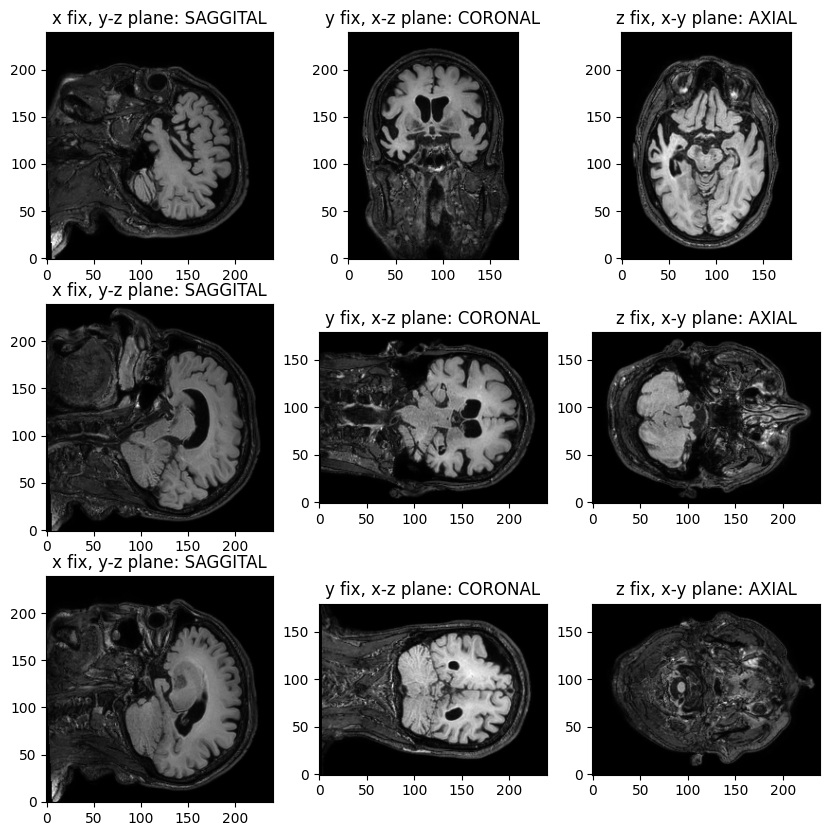

In [16]:
# Display two MRI slices of two different modalities of one subject
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

def display_slices(subject_id, modality="T1xFLAIR"):
    base_path = "/mnt/turing/LIA/pazienti"
    subject_path = os.path.join(base_path, subject_id)
    
    file = os.path.join(subject_path, f"{subject_id}_{modality}.nii")
    
    if not os.path.exists(file):
        print(f"Files for subject {subject_id} not found.")
        return
    
    file_img = nib.load(file)
    
    file_data = file_img.get_fdata()
    
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))

    
    axs[0,0].imshow(file_data[130, :, :], cmap="gray")
    axs[0,0].set_title("x fix, y-z plane: SAGGITAL")
    axs[0,1].imshow(file_data[:, 130, :].T, cmap="gray")
    axs[0,1].set_title("y fix, x-z plane: CORONAL")
    print(file_data[:, :, 130].shape)
    axs[0,2].imshow(file_data[:, :, 130].T, cmap="gray")
    axs[0,2].set_title("z fix, x-y plane: AXIAL")
    
    axs[1,0].imshow(file_data[100, :, :], cmap="gray")
    axs[1,0].set_title("x fix, y-z plane: SAGGITAL")
    axs[1,1].imshow(file_data[:, 100, :], cmap="gray")
    axs[1,1].set_title("y fix, x-z plane: CORONAL")
    axs[1,2].imshow(file_data[:, :, 100], cmap="gray")
    axs[1,2].set_title("z fix, x-y plane: AXIAL")
    
    axs[2,0].imshow(file_data[70, :, :], cmap="gray")
    axs[2,0].set_title("x fix, y-z plane: SAGGITAL")
    axs[2,1].imshow(file_data[:, 70, :], cmap="gray")
    axs[2,1].set_title("y fix, x-z plane: CORONAL")
    axs[2,2].imshow(file_data[:, :, 70], cmap="gray")
    axs[2,2].set_title("z fix, x-y plane: AXIAL")
    
    # Loop through all axes in the figure and invert the y-axis
    for ax in fig.get_axes():
        ax.invert_yaxis()
    
    plt.show()
    
# Example usage
display_slices("046")

# (180 x 240 x 240)

In [6]:
path = "/mnt/turing/LIA/pazienti/001/001_T1xFLAIR.nii"
img = nib.load(path)
data = img.get_fdata()
print(data.shape)

(180, 240, 240)


In [12]:
print("Hello World!")
def set_qform_and_save(subject_id):
    base_path = "/mnt/turing/LIA/pazienti"
    subject_path = os.path.join(base_path, subject_id)
    
    t1xflair_file = os.path.join(subject_path, f"{subject_id}_T1xFLAIR.nii")
    t1xflair_seg_file = os.path.join(subject_path, f"{subject_id}_ChP_mask_T1xFLAIR_manual_seg.nii")
    t1_file = os.path.join(subject_path, f"{subject_id}_T1.nii")
    
    if not os.path.exists(t1xflair_file) or not os.path.exists(t1xflair_seg_file) or not os.path.exists(t1_file):
        print(f"Files for subject {subject_id} not found.")
        return
    
    t1xflair_img = nib.load(t1xflair_file)
    t1xflair_seg_img = nib.load(t1xflair_seg_file)
    t1_img = nib.load(t1_file)
    
    t1_qform = t1_img.get_qform()
    
    t1xflair_img.set_qform(t1_qform)
    t1xflair_seg_img.set_qform(t1_qform)
    
    new_t1xflair_file = os.path.join(subject_path, f"{subject_id}_T1xFLAIR_qform.nii")
    new_t1xflair_seg_file = os.path.join(subject_path, f"{subject_id}_ChP_mask_T1xFLAIR_manual_seg_qform.nii")
    
    nib.save(t1xflair_img, new_t1xflair_file)
    nib.save(t1xflair_seg_img, new_t1xflair_seg_file)
    
    print(f"New files saved for subject {subject_id}:")
    print(new_t1xflair_file)
    print(new_t1xflair_seg_file)

# Example usage
set_qform_and_save("065")

Hello World!
New files saved for subject 065:
/mnt/turing/LIA/pazienti/065/065_T1xFLAIR_qform.nii
/mnt/turing/LIA/pazienti/065/065_ChP_mask_T1xFLAIR_manual_seg_qform.nii


In [12]:
import os
import numpy as np
import nibabel as nib

def check_qform(pazienti_folder):
    for subject_id in os.listdir(pazienti_folder):
        print("Subject ID:", subject_id)
        subject_path = os.path.join(pazienti_folder, subject_id)
        if os.path.isdir(subject_path):
            t1xflair_file = os.path.join(subject_path, f"{subject_id}_T1xFLAIR.nii")
            t1xflair_seg_file = os.path.join(subject_path, f"{subject_id}_ChP_mask_T1xFLAIR_manual_seg.nii")
            t1_file = os.path.join(subject_path, f"{subject_id}_T1.nii")
            
            if not os.path.exists(t1xflair_file) or not os.path.exists(t1xflair_seg_file) or not os.path.exists(t1_file):
                print(f"Files for subject {subject_id} not found.")
                continue
            
            t1xflair_img = nib.load(t1xflair_file)
            t1xflair_seg_img = nib.load(t1xflair_seg_file)
            t1_img = nib.load(t1_file)
            
            t1_qform = t1_img.get_qform()
            t1xflair_qform = t1xflair_img.get_qform()
            t1xflair_seg_qform = t1xflair_seg_img.get_qform()
            
            if np.allclose(t1_qform, t1xflair_qform) and np.allclose(t1_qform, t1xflair_seg_qform):
                print(f"Subject {subject_id}: qforms are almost equal")
            else:
                print(f"Subject {subject_id}: qforms are not equal")
                
pazienti_folder = "/mnt/turing/LIA/pazienti"
check_qform(pazienti_folder)


Subject ID: 053
Subject 053: qforms are almost equal
Subject ID: 078
Subject 078: qforms are almost equal
Subject ID: 098
Subject 098: qforms are almost equal
Subject ID: 049
Subject 049: qforms are almost equal
Subject ID: 076
Subject 076: qforms are almost equal
Subject ID: 027
Subject 027: qforms are almost equal
Subject ID: 055
Subject 055: qforms are almost equal
Subject ID: 091
Subject 091: qforms are almost equal
Subject ID: 035
Subject 035: qforms are almost equal
Subject ID: 065
Subject 065: qforms are almost equal
Subject ID: 064
Subject 064: qforms are almost equal
Subject ID: 074
Subject 074: qforms are almost equal
Subject ID: folds.json
Subject ID: 080
Subject 080: qforms are almost equal
Subject ID: 051
Subject 051: qforms are almost equal
Subject ID: 030
Subject 030: qforms are almost equal
Subject ID: DB_pathologies.xlsx
Subject ID: 097
Subject 097: qforms are almost equal
Subject ID: 062
Subject 062: qforms are almost equal
Subject ID: 022
Subject 022: qforms are almo

In [16]:
# Check predictions of patients  27, 44 and 75 
subject_id = "027"
subject_path = os.path.join(pazienti_folder, subject_id)
prediction_path = "/home/studenti/lia/lia_masterthesis/phuse_thesis_2024/thesis_experiments/umamba_predictions/working_directory_T1xFLAIR/pred_pp"

subject_pred_file = prediction_path + "/" + subject_id + ".nii.gz"
t1xflair_file = os.path.join(subject_path, f"{subject_id}_T1xFLAIR.nii")
t1xflair_seg_file = os.path.join(subject_path, f"{subject_id}_ChP_mask_T1xFLAIR_manual_seg.nii")
t1_file = os.path.join(subject_path, f"{subject_id}_T1.nii")
            

t1xflair_pred_img = nib.load(subject_pred_file)
t1xflair_img = nib.load(t1xflair_file)
t1xflair_seg_img = nib.load(t1xflair_seg_file)
t1_img = nib.load(t1_file)

# extract and compare headers: 
t1xflair_pred_qform = t1xflair_pred_img.get_qform()
t1xflair_qform = t1xflair_img.get_qform()
t1xflair_seg_qform = t1xflair_seg_img.get_qform()
t1_qform = t1_img.get_qform()
print("qforms: ", t1xflair_pred_qform, t1xflair_qform, t1xflair_seg_qform, t1_qform)

# Extract and compare data header
t1_header = t1_img.header; t1xflair_header = t1xflair_img.header; 
t1xflair_seg_header = t1xflair_seg_img.header; t1xflair_pred_header = t1xflair_pred_img.header

# Extract and compare qoffsets
t1_qoffset_x = t1_header['qoffset_x']
t1_qoffset_y = t1_header['qoffset_y']
t1_qoffset_z = t1_header['qoffset_z']
print("T1 qoffsets: ", t1_qoffset_x, t1_qoffset_y, t1_qoffset_z)

t1xflair_qoffset_x = t1xflair_header['qoffset_x']
t1xflair_qoffset_y = t1xflair_header['qoffset_y']
t1xflair_qoffset_z = t1xflair_header['qoffset_z']
print("T1xFLAIR qoffsets: ", t1xflair_qoffset_x, t1xflair_qoffset_y, t1xflair_qoffset_z)

t1xflair_seg_qoffset_x = t1xflair_seg_header['qoffset_x']
t1xflair_seg_qoffset_y = t1xflair_seg_header['qoffset_y']
t1xflair_seg_qoffset_z = t1xflair_seg_header['qoffset_z']
print("T1xFLAIR Seg qoffsets: ", t1xflair_seg_qoffset_x, t1xflair_seg_qoffset_y, t1xflair_seg_qoffset_z)

t1xflair_pred_qoffset_x = t1xflair_pred_header['qoffset_x']
t1xflair_pred_qoffset_y = t1xflair_pred_header['qoffset_y']
t1xflair_pred_qoffset_z = t1xflair_pred_header['qoffset_z']
print("T1xFLAIR Pred qoffsets: ", t1xflair_pred_qoffset_x, t1xflair_pred_qoffset_y, t1xflair_pred_qoffset_z)





qforms:  [[ 9.98611510e-01 -2.80866965e-03  5.25043018e-02 -9.12039871e+01]
 [ 2.52386050e-03  9.99981746e-01  5.48975591e-03 -1.11263062e+02]
 [-5.25184869e-02 -5.34964796e-03  9.98605608e-01 -1.14610588e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] [[ 9.98611510e-01 -2.80866965e-03  5.25043018e-02 -9.12039871e+01]
 [ 2.52386050e-03  9.99981746e-01  5.48975591e-03 -1.11263062e+02]
 [-5.25184869e-02 -5.34964796e-03  9.98605608e-01 -1.14610588e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] [[ 9.98611510e-01 -2.80866965e-03  5.25043018e-02 -9.12039871e+01]
 [ 2.52386050e-03  9.99981746e-01  5.48975591e-03 -1.11263062e+02]
 [-5.25184869e-02 -5.34964796e-03  9.98605608e-01 -1.14610588e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] [[ 9.98616749e-01 -2.80865128e-03  5.25042832e-02 -9.12039871e+01]
 [ 2.52385348e-03  9.99981746e-01  5.48979308e-03 -1.11263062e+02]
 [-5.25187437e-02 -5.34968620e-03  9.98605609e-01 

In [15]:
t1_qoffset_x

array(-91.20399, dtype=float32)